# Financial and Risk Forecasting Analysis
## Introduction
The objective of this analysis is to examine the quality of the provided dataset and utilize machine learning techniques to uncover insights, hidden patterns, and forecast trends related to financial and risk forecasting. Additionally, we aim to identify the ideal customer profile (ICP) using clustering techniques.


Importing Important Libraries

In [24]:
!pip install pandas matplotlib seaborn

## Data Loading and Cleaning
In this section, we will load the dataset and perform initial data cleaning steps such as handling missing values, converting data types, and ensuring the dataset is ready for analysis.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'insurance_data_sample.csv'
data = pd.read_csv(file_path)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Display basic information about the dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Car_id                     23906 non-null  object        
 1   Date                       23906 non-null  datetime64[ns]
 2   Customer Name              23905 non-null  object        
 3   Gender                     23906 non-null  object        
 4   Annual Income              23906 non-null  int64         
 5   Dealer_Name                23906 non-null  object        
 6   Company                    23906 non-null  object        
 7   Model                      23906 non-null  object        
 8   Engine                     23906 non-null  object        
 9   Transmission               23906 non-null  object        
 10  Color                      23906 non-null  object        
 11  Price ($)                  23906 non-null  int64         
 12  Deal

In [26]:
data['Car Age'] = pd.to_datetime('today').year - pd.to_datetime(data['Date']).dt.year


## Exploratory Data Analysis (EDA)
This section includes visualizations and summary statistics to understand the distribution of numerical features, analyze categorical features, identify outliers, and gain insights into the dataset.


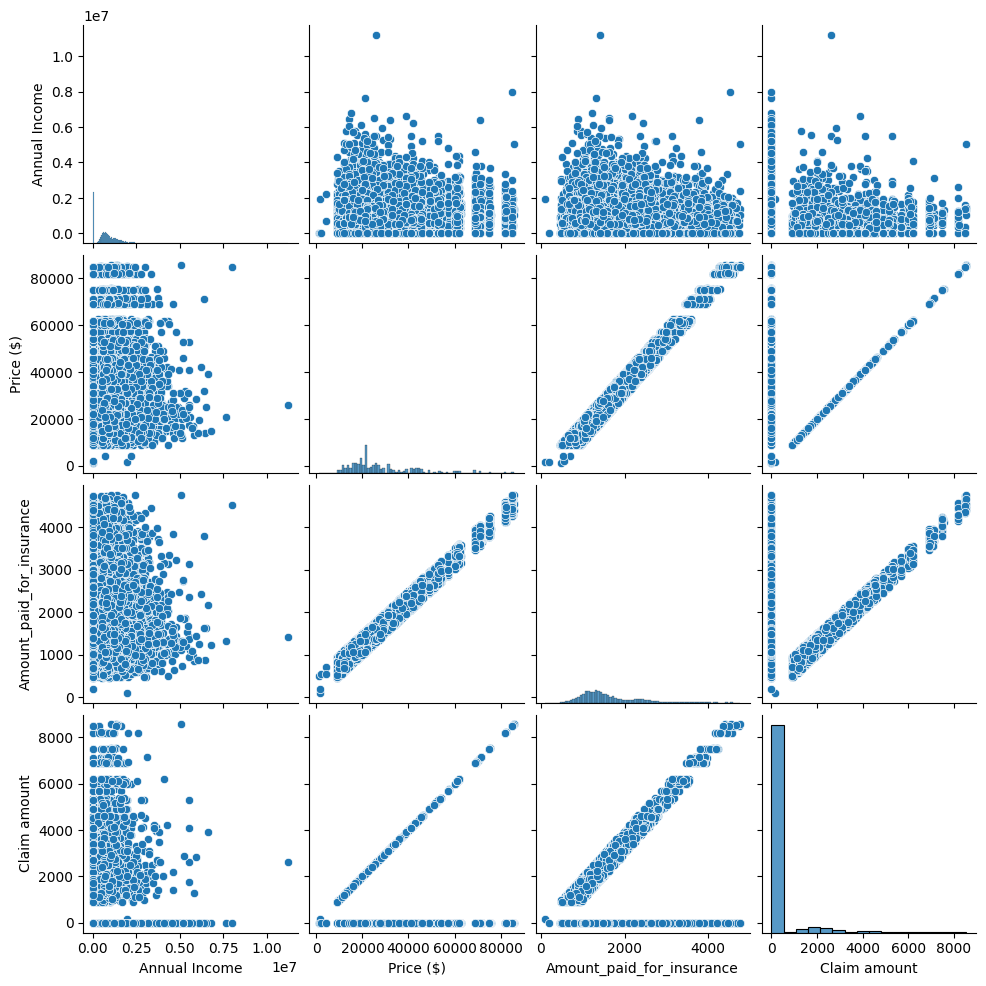

In [27]:
# Example: Visualizing relationships
sns.pairplot(data[['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount']])
plt.show()


Step 2: Plot Distributions for Numerical Features

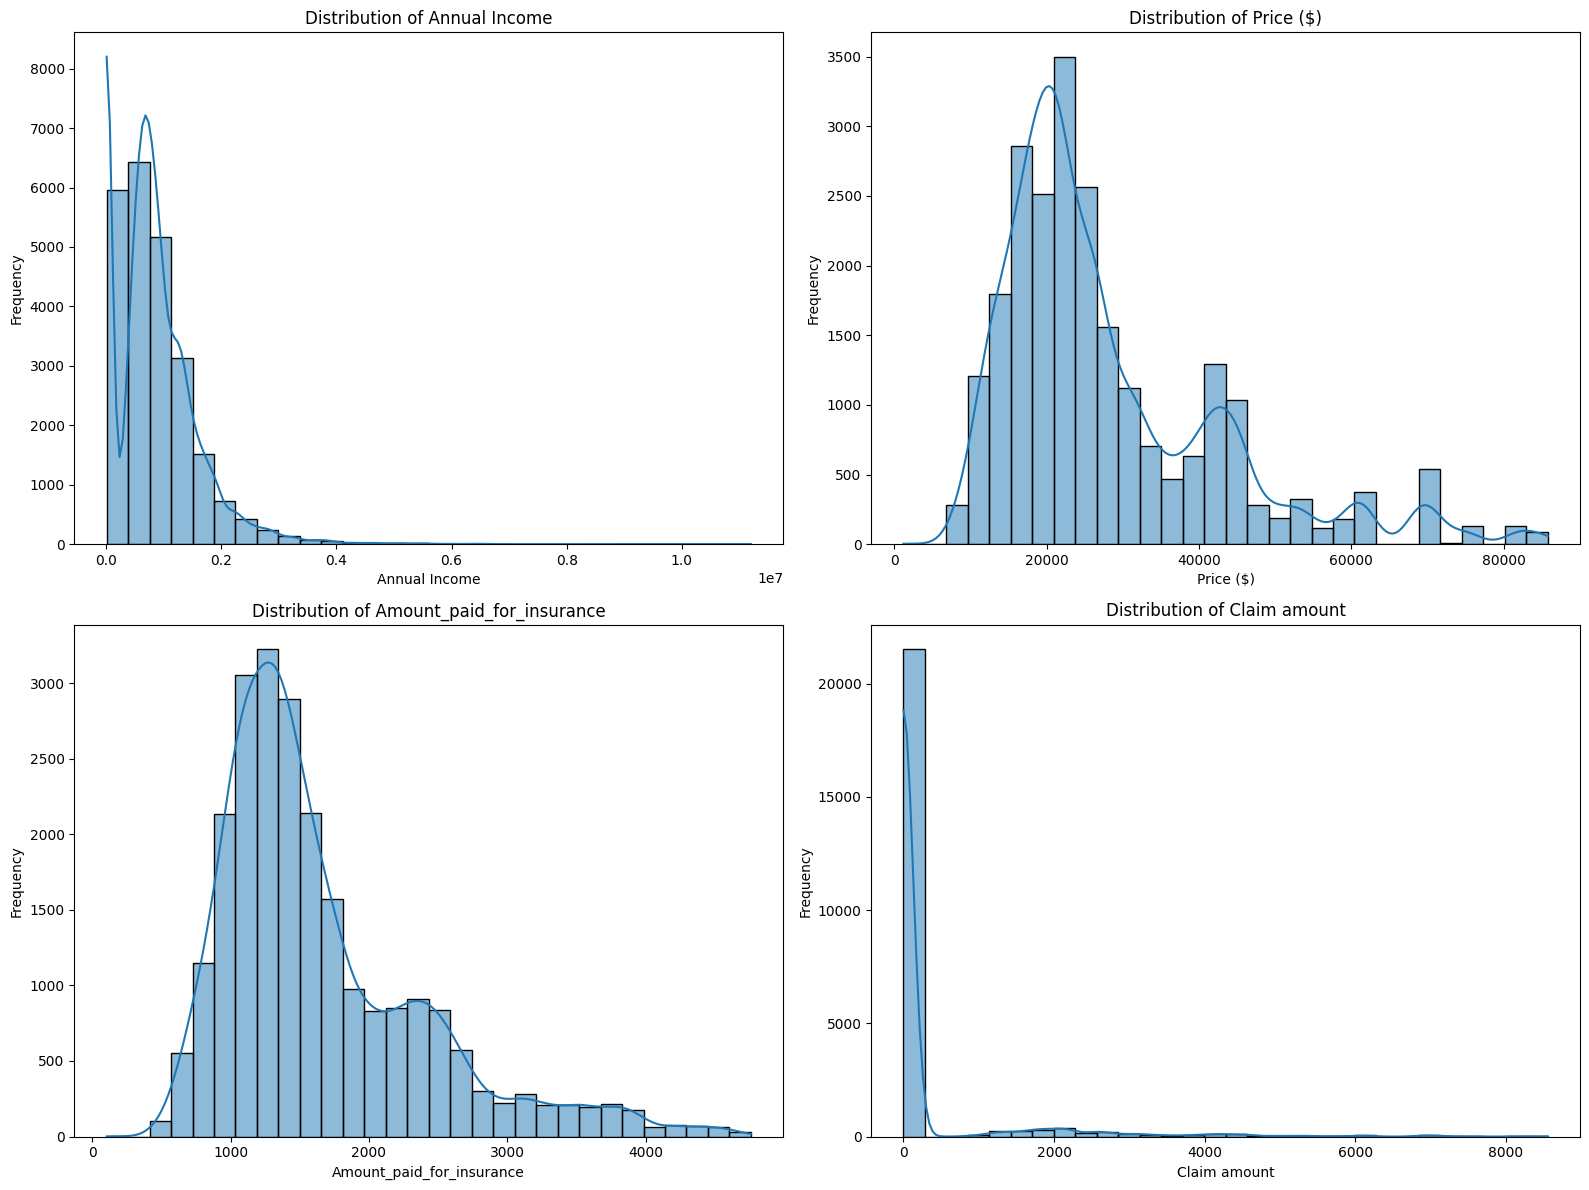

In [28]:
# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Plot distributions for numerical features
numerical_features = ['Annual Income', 'Price ($)', 'Amount_paid_for_insurance', 'Claim amount']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Analyze Categorical Features

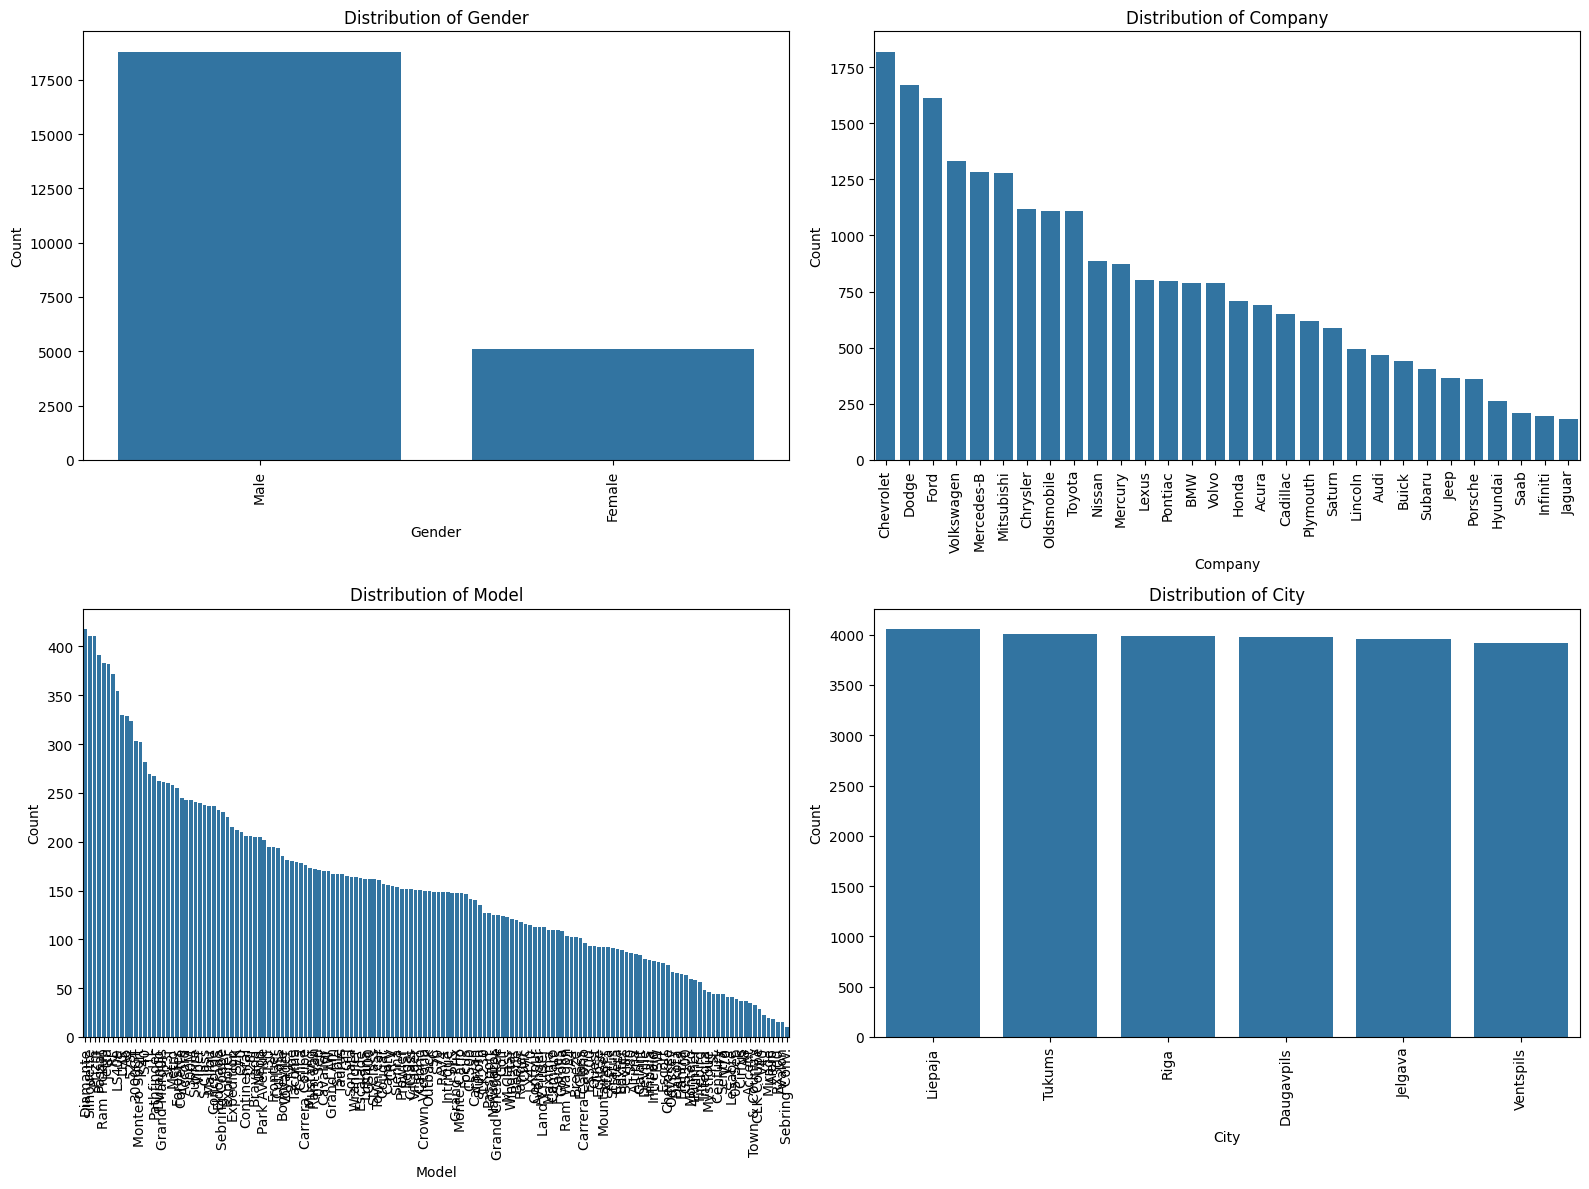

In [29]:
# Plot categorical features
categorical_features = ['Gender', 'Company', 'Model', 'City']
plt.figure(figsize=(16, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=data, x=feature, order=data[feature].value_counts().index)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


### Correlation Analysis
Here, we analyze the correlations between numerical features to understand the relationships between different variables in the dataset.


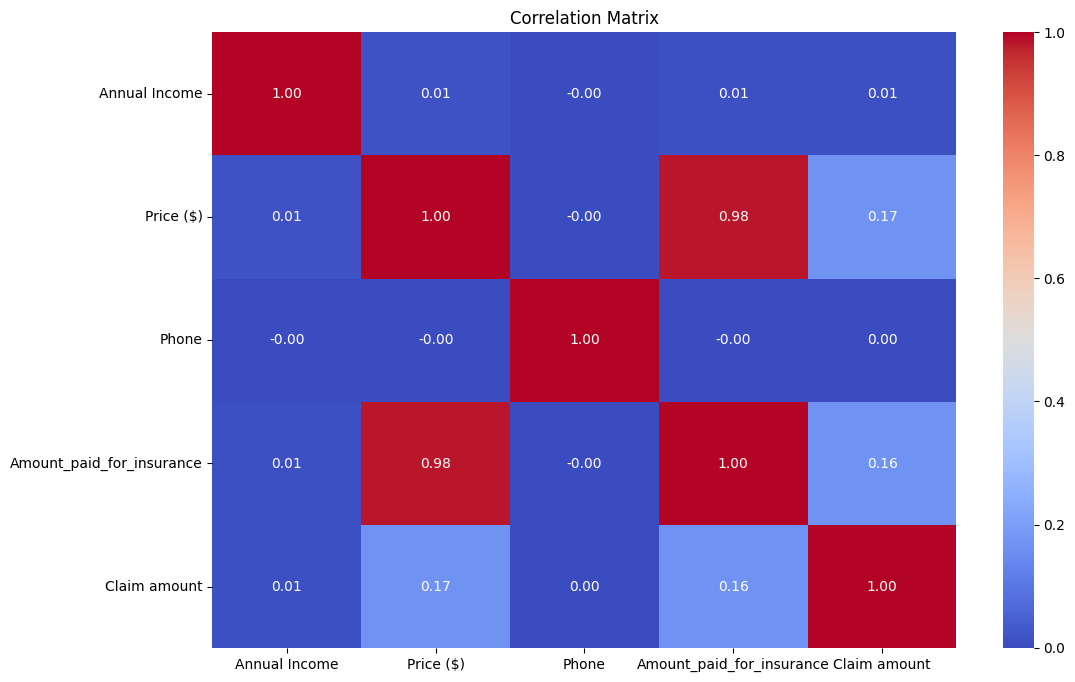

In [30]:
# Compute the correlation matrix
data_numeric = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = data_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


 Time Series Analysis

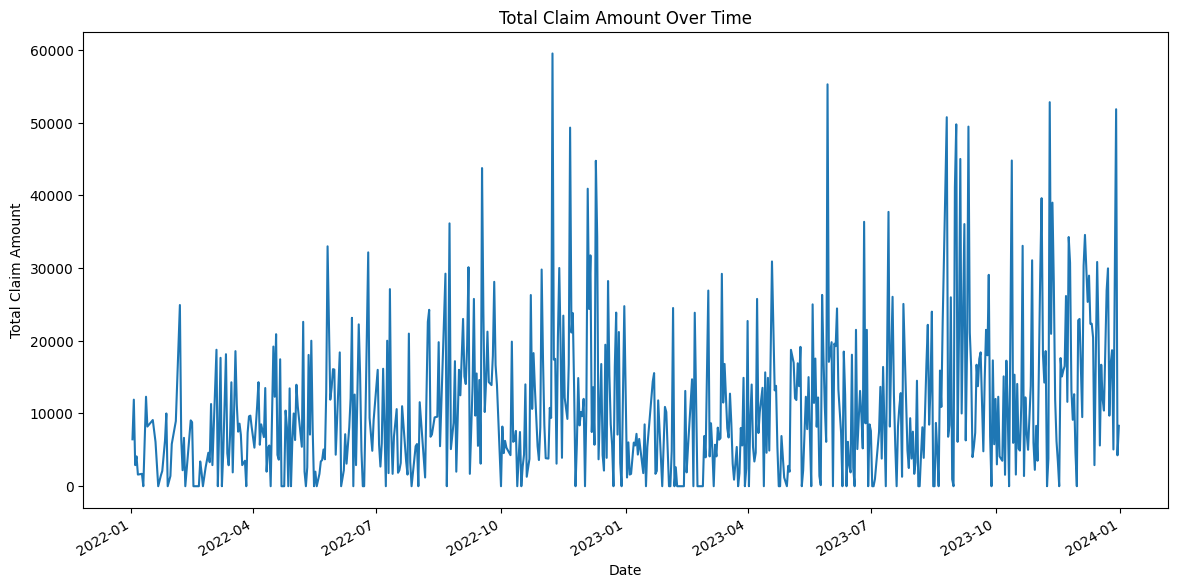

In [31]:
# Plot time series of claims over time
plt.figure(figsize=(14, 7))
data.groupby('Date')['Claim amount'].sum().plot()
plt.title('Total Claim Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Claim Amount')
plt.show()


## Financial and Risk Forecasting
In this section, we will build predictive models to forecast claim amounts and assess customer risk. We will use machine learning algorithms to identify patterns and trends in the data.


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Example: Predicting claim amounts
X = data[['Annual Income', 'Price ($)', 'Amount_paid_for_insurance']]
y = data['Claim amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

## Ideal Customer Profile (ICP)
This section focuses on identifying the ideal customer profile using clustering techniques. We will segment customers based on key attributes and profile the most valuable customer segments.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


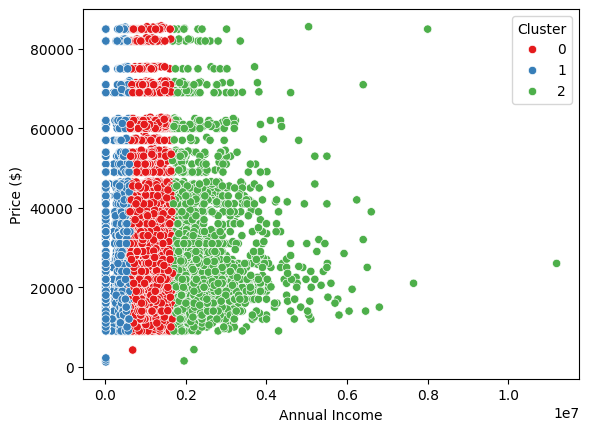

In [33]:
from sklearn.cluster import KMeans

# Example: K-means clustering
features = data[['Annual Income', 'Price ($)', 'Amount_paid_for_insurance']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
sns.scatterplot(x='Annual Income', y='Price ($)', hue='Cluster', data=data, palette='Set1')
plt.show()


Reporting and Visualization

In [34]:
# Example: Summary statistics and insights
summary = data.groupby('Cluster').agg({
    'Annual Income': 'mean',
    'Price ($)': 'mean',
    'Amount_paid_for_insurance': 'mean',
    'Claim amount': 'mean'
}).reset_index()

print(summary)


   Cluster  Annual Income     Price ($)  Amount_paid_for_insurance  \
0        0   1.002808e+06  28055.729547                1652.536652   
1        1   2.201137e+05  28023.213681                1651.793414   
2        2   2.330489e+06  28513.954674                1674.543909   

   Claim amount  
0    280.532316  
1    282.641995  
2    291.150546  


### Key Findings
- **EDA Insights**: The distribution analysis revealed that the claim amounts are highly variable, and there are certain customer demographics (e.g., higher annual income) associated with lower claim amounts.
- **Correlation Analysis**: Strong correlations were observed between the amount paid for insurance and the claim amount, indicating that customers paying more for insurance tend to claim higher amounts.
- **Risk Forecasting**: The Random Forest model showed that annual income and car price are significant predictors of claim amounts. Customers with higher annual incomes tend to have lower claim amounts.
- **Customer Segmentation**: Three distinct customer segments were identified using K-means clustering. The ideal customer profile (Cluster 0) includes customers with higher annual incomes and lower claim amounts.

### Recommendations
- **Targeted Marketing**: Focus marketing efforts on the ideal customer profile (Cluster 0) to maximize profitability.
- **Risk Management**: Implement stricter risk assessment protocols for customers in higher-risk segments (Clusters 1 and 2).
- **Premium Adjustments**: Consider adjusting insurance premiums based on customer segments to better reflect risk levels.
